# Particle detection efficiency

We are designing an experiment to detect particles as shown in the figure. When traversing the planes, a particle has a probability of 85% in each detector to induce a signal. Our goal is to decide how many detectors to build for the whole experiment.

![detector](data/particle-detector.png)



In [1]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
from scipy.stats import binom, poisson, norm

Let's first plot the probability distribution for the number of signals registered if the particle travels through four detectors.

Text(0.5, 1.0, 'Probability distribution with four detectors')

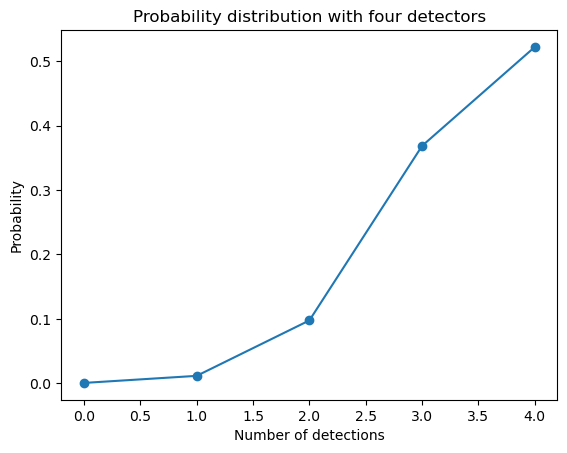

In [4]:
p = 0.85
n_det = 4

# pmf
r = np.arange(n_det+1)
P = binom.pmf(r, n_det, p)

# plot
plt.plot(r, P, '-o')
plt.xlabel('Number of detections')
plt.ylabel('Probability')
plt.title('Probability distribution with four detectors')

Next, we assume that in order to detect a particle (and to avoid detecting ”ghost particles”), we must have signals in at least three detectors. How many detectors need to be built to ensure that the particle detection efficiency is above 99%?

In [6]:
# cdf
tries = np.arange(4, 20)
# probilities by using cdf
for n in tries:
    detections = 1-binom.cdf(2, n, p)
    if detections > 0.99:
        print(n, 'detectors provide an efficiency of >99%.')
        break

6 detectors provide an efficiency of > 99%.


Finally, we run your experiment with four detectors and produce 1000 particles which are sent through the four detector planes. We plot the probability distribution of the number of detected particles (number of particles with more than 3 signals). Does the width of the distribution agree with what one would expect from the Poisson distribution?

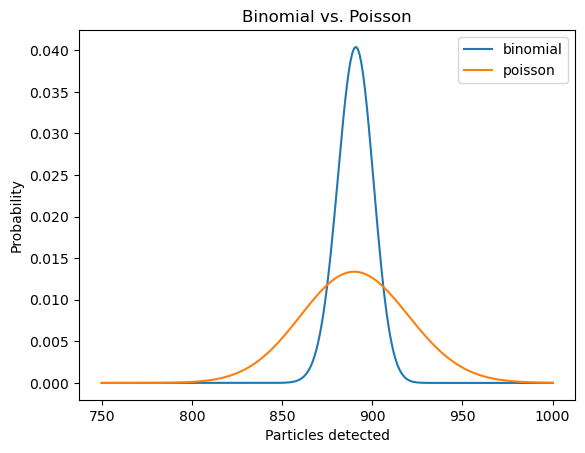

In [8]:
# cdf
n_tries = 1000
r_tries = np.arange(750, n_tries+1)
P_3 = 1-binom.cdf(2, n_det, p) ## probability for 3 | 4 detections
det_part = binom.pmf(r_tries, n_tries, P_3)

# plot
plt.cla()
plt.plot(r_tries, det_part, label='binomial')
plt.plot(r_tries, poisson.pmf(r_tries, n_tries*P_3), label='poisson')
plt.xlabel('Particles detected')
plt.ylabel('Probability')
plt.title('Binomial vs. Poisson')
plt.legend()

We find that, the width of the poisson distribution is bigger,  because the  binomial distribution includes the exact number of particles shot at the detector.

# PDFs and CDFs

To build a fence around our house we order a few hundred wood boards from a local carpenter. Being a fellow physicist, the carpenter reports that the heights of the wood boards are well described by a gaussian distribution with μ = 1m and σ = 1cm. Using the properties of the Gaussian distribution, we answer the following:
* What is the probability to observe a wood board with a height within [0.97, 1.03] m?
* What is the probability to observe a wood board with a height within [0.99, 1.00] m?
* What is the probability to observe a wood board with a height within [0.95, 1.05] m?
* What is the probability to observe a wood board with a height less than 1.015 m?

First, we define a function to integrate the PDF:

In [10]:
def integrate(dist, lower, upper):
    """Integrate the pdf of a distribution between lower and upper.

    Parameters
    ----------
    dist : scipy.stats.rv_continuous
        A scipy.stats distribution object.
    lower : float
        Lower limit of the integration.
    upper : float
        Upper limit of the integration.

    Returns
    -------
    integral : float
        The integral of the pdf between lower and upper.
    """
    return dist.cdf(upper)-dist.cdf(lower)

mu = 1.
sigma = 0.01
# normal distribution
p_gauss = norm(mu, sigma)
prob_a = np.zeros(4)
prob_a[0]= integrate(p_gauss, 0.97, 1.03) # a
prob_a[1] = integrate(p_gauss, 0.99, 1.) # b
prob_a[2] = integrate(p_gauss, 0.95, 1.05) # c
prob_a[3] = integrate(p_gauss, 0., 1.015) # d

print(('Probabilities for [0.97, 1.03]:{} \n'
      '                   [0.99, 1.00]:{} \n'
      '                   [0.95, 1.05]:{} \n'
      '                   [0, 1.015]:{}.').format(np.round(prob_a, 3)[0],np.round(prob_a, 3)[1],
                                                 np.round(prob_a, 3)[2],np.round(prob_a, 3)[3]))

Probabilities for [0.97, 1.03]:0.997 
                   [0.99, 1.00]:0.341 
                   [0.95, 1.05]:1.0 
                   [0, 1.015]:0.933.


# Approximation of the binomial distribution
The Z-boson decays with a probability of 82% into charged particles and with about 18% probability into neutrinos, which cannot be detected in regular particle detectors. In some experiment, 500 Z-bosons were produced during a running time of 125 hours. In this experiment charged particlesare detected with a 100% efficiency.

Let's write a Python script that uses a binomial distribution to calculate the probability for 390 or more Z-bosons to be detected using charged particles:

In [13]:
p_charged = .82
p_neut = .18
n_bos = 500
t = 125 #hours
r_4 = np.arange(1, n_bos)
p_binom = binom.pmf(r_4, n_bos, p_charged)
p_binom_390 = 1-binom.cdf(389, n_bos, p_charged)
print('P(>390 bosons) detected using charged particles: ', np.round(p_binom_390, 5), '\n')

P(>390 bosons) detected using charged particles:  0.9902 



Knowing the expected value and its standard deviation, we use a gaussian approximation of the binomial distribution. We write a Python script that determines the same as in the upper part. then, we plot both the original distribution and the approximation together. How good is this approximation?

Gauss approximation result:  0.99005


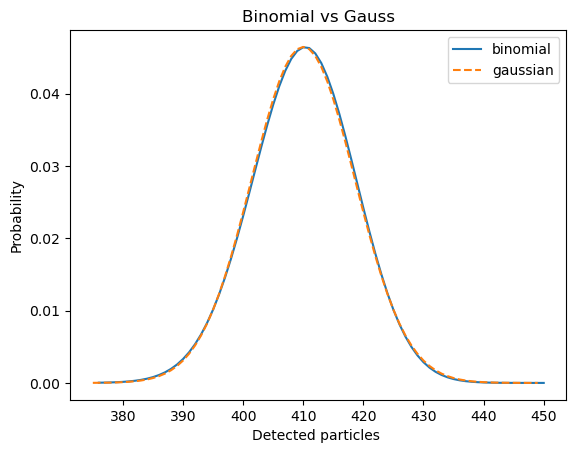

In [18]:
# set values
mu_approx = n_bos*p_charged
sigma_approx = np.sqrt(n_bos*p_charged*(1-p_charged))
lam = n_bos*p_charged
# gauss func
gauss = lambda x: 1/(np.sqrt(sigma_approx**2*2*np.pi))*np.exp(-0.5*((x-mu_approx)/sigma_approx)**2)
# integrate
x = np.arange(500)
p_gauss_390 = scipy.integrate.quad(gauss, 390, 500)[0]
n1 = 375
n2 = 450

# plot
plt.cla()
plt.plot(r_4[n1:n2], p_binom[n1:n2], label='binomial')
plt.plot(x[n1:n2], gauss(x)[n1:n2], label = 'gaussian', linestyle = "--")
plt.legend()
plt.xlabel('Detected particles ')
plt.ylabel('Probability')
plt.title('Binomial vs Gauss')

# print
print('Gauss approximation result: ', np.round(p_gauss_390, 5))

The approximation is quite good, as is relies up on a big number of trails. However, small error is still seen.

Let's now make a Poisson approximation. We write a Python script to determine the same as in the first part. Again, we plot both the original distribution and its approximation together. How good is this approximation?

C
Poisson approximation result:  0.84
Due to poisson, there is a big loss of information as before.


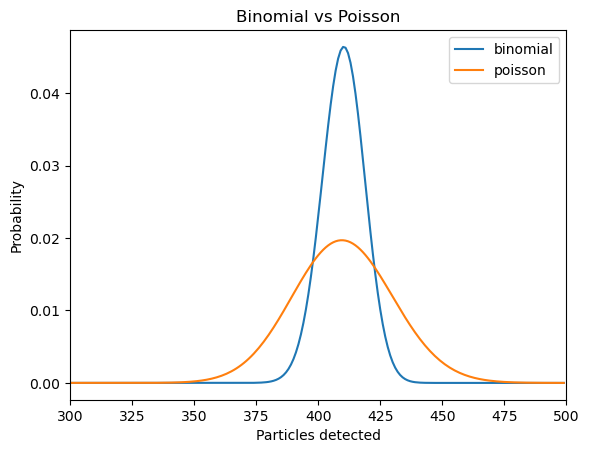

In [20]:
# experiment
p_poisson_390 = 1-poisson.cdf(389, lam)
p_poisson = poisson.pmf(r_4, lam)

# plot
plt.cla()
plt.plot(r_4, p_binom, label='binomial')
plt.plot(r_4, p_poisson, label = 'poisson')
plt.xlabel('Particles detected')
plt.ylabel('Probability')
plt.xlim(300, 500)
plt.title('Binomial vs Poisson')
plt.legend()

# print
print('Poisson approximation result: ', np.round(p_poisson_390, 2))

Due to using the Poisson as approximation, we see a that there is a bigger loss of information and thus the approximation gets worse compared to above.

Finally, we write a Python script to determine the probability that at least one Z-boson was created, but could not be observed because it decayed to neutrinos, during the first hour of running this experiment. We may assume that the rate of Z-bosons being produced is constant. We use both the binomial distribution and its Poisson approximation to determine this and we plot both distributions together. How good is the approximation this time? Why is it different to the approximation above?

P(>=1 bosons) decay into neutrinos in 1h: 
binomial:  0.55
poisson:  0.82


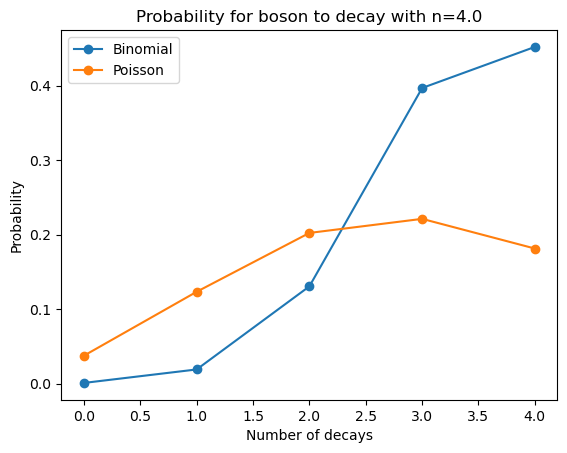

In [22]:
n_1h = n_bos/t
expected = n_1h*p_charged

# experiments
r_charged = np.arange(n_1h + 1)
p_bos_charged_bin = binom.pmf(r_charged, n_1h, p_charged)
p_bos_charged_poiss = poisson.pmf(r_charged, expected)
p_all_charged_bin = p_bos_charged_bin[-1]
p_all_charged_poiss = p_bos_charged_poiss[-1]
p_atleast1_neutr_bin = 1- p_all_charged_bin
p_atleast1_neutr_poiss = 1- p_all_charged_poiss

# plot
plt.cla()
plt.plot(r_charged, p_bos_charged_bin, '-o', label ='Binomial')
plt.plot(r_charged, p_bos_charged_poiss, '-o', label = 'Poisson')
plt.xlabel('Number of decays')
plt.ylabel('Probability')
plt.legend()
plt.title('Probability for boson to decay with n=' + str(n_1h))

# print
print('P(>=1 bosons) decay into neutrinos in 1h: ')
print('binomial: ', np.round(p_atleast1_neutr_bin, 2))
print('poisson: ', np.round(p_atleast1_neutr_poiss, 2))

Here, the poisson distribution is unrepresentative,  as information of exact number of particles that will reach the detector is lost.